# Modeling with Ridge

This workbook was to see how Ridge affected the coefficients of target features compared to Linear Regression.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, median_absolute_error
import os
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [2]:
# use absolute path to retrieve datasets

train = pd.read_csv(os.path.abspath('./datasets/cleaned_train.csv'))
# sample = pd.read_csv(os.path.abspath('./datasets/sample_sub_reg.csv'))

[source for absolute path](https://stackoverflow.com/questions/51520/how-to-get-an-absolute-file-path-in-python)

In [3]:
train.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,total_baths,bsmt_finished,size_n_qual,bed_n_bath,fin_bsmt_fin_qual,bsmt_fin_n_ceiling,bsmt_finished_with_bath,bsmt_finished_with_halfbath,bsmt_size_fin_sf,overall_qual_cond
0,109,60,RL,77.504886,13517,2,3,4,4,CulDSac,...,3.0,533.0,8874,9.0,2665.0,533.0,0.0,0.0,386425.0,48
1,544,60,RL,43.000000,11492,2,3,4,4,CulDSac,...,4.0,637.0,14854,16.0,3185.0,1274.0,637.0,0.0,581581.0,35
2,153,20,RL,68.000000,7922,2,4,4,4,Inside,...,2.0,731.0,5285,6.0,3655.0,731.0,731.0,0.0,772667.0,35
3,318,60,RL,73.000000,9802,2,4,4,4,Inside,...,3.0,0.0,7220,9.0,0.0,0.0,0.0,0.0,0.0,25
4,255,50,RL,82.000000,14235,2,3,4,4,Inside,...,2.0,0.0,8670,6.0,0.0,0.0,0.0,0.0,0.0,48


In [4]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       

In [5]:
drop_lst = []
drop_lst.extend(['pool_area',  #not applicable to most homes
                'enclosed_porch',
                '3ssn_porch',
                'screen_porch',
                'garage_yr_blt',
                'bsmt_half_bath',
                'functional',
               'low_qual_fin_sf',
                'garage_qual',
                'paved_drive', 
                'central_air',
                'bsmtfin_sf_2',
                'kitchen_abvgr',
               'utilities',
               'land_slope', 
               'lot_area',
               'street',
               'land_slope', 
                'yr_sold',
                'bsmtfin_type_2',
                 'bsmtfin_sf_2',
                'exterior_2nd',
                'heating',
                'electrical','condition_1', 
                 'condition_2']) 

In [6]:
best_lasso_features = ['lot_area',
 'bsmt_fin_n_ceiling',
 'functional',
 'total_bsmt_sf',
 'overall_cond',
 'year_built',
 'overall_qual',
 'gr_liv_area']

In [7]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       

In [8]:
focus_features = ['kitchen_qual',
                 'garage_type', 'bsmt_full_bath',
                  'bsmt_half_bath',
                 'bsmt_finished',
                 'bsmt_qual',
                 'bsmt_half_bath']

In [9]:
set(focus_features)

{'bsmt_finished',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'bsmt_qual',
 'garage_type',
 'kitchen_qual'}

# Baseline

In [10]:
# perserving baseline from first model attempt
baseline = train['saleprice'].mean()
baseline_list = [baseline for i in range(2049)]
baseline_score = r2_score(train['saleprice'], baseline_list)
baseline_score

0.0

# Prepping for the model

In [11]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       

In [12]:
# making list of training feature names

features = set([c for c in focus_features if 
            (c != 'saleprice') & (c != 'id') & (c not in drop_lst)])

y = train['saleprice']

In [13]:
X = train[features]
X = pd.get_dummies(X, columns = ['garage_type'], drop_first=True)
y = train['saleprice']

In [14]:
X.head()

,bsmt_finished,bsmt_qual,kitchen_qual,bsmt_full_bath,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,533.0,1,2,0.0,0,1,0,0,0,0
1,637.0,2,2,1.0,0,1,0,0,0,0
2,731.0,1,2,1.0,0,0,0,0,0,1
3,0.0,2,1,0.0,0,0,0,1,0,0
4,0.0,0,1,0.0,0,0,0,0,0,1


## Train Test Split

In [15]:
# finding missing columns in test vs train data
def find_missing_test_columns(train, test):
    return [col for col in train.columns if col not in test.columns]

In [16]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
find_missing_test_columns(X_train, X_test)

[]

## Scaling

In [18]:
# scaling data before fitting

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)  #or in same line - fit_transform
X_test_sc = ss.transform(X_test)

In [19]:
# power trainsformer for test and train
# pt = PowerTransformer()
# pt.fit(X_train)
# X_train = pt.transform(X_train)
# X_test = pt.transform(X_test)

In [20]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

# Instantiate Models

In [21]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

## Cross Validation

In [22]:
# over/underfitting?

cross_val_score(ridge, X_train_sc, y_train_pt, cv = 5)

array([0.69971199, 0.67599889, 0.6624075 , 0.7091736 , 0.66701925])

In [23]:
baseline_previous = (0.89426015, 0.89282737, 0.85105365, 0.89859521, 0.86169427)

In [24]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train_pt, cv=3)
ridge_scores.mean()

0.6836354394375638

# Model Fitting and Evaluation

In [25]:
ridge_model = ridge.fit(X_train_sc, y_train_pt)

In [26]:
ridge_score = ridge_model.score(X_train_sc, y_train_pt)
print(f'ridge Train: {ridge_score}')

ridge Train: 0.6893451254799894


In [27]:
ridge_test_score = ridge_model.score(X_test_sc, y_test_pt)
print(f'ridge Test: {ridge_test_score}')

ridge Test: 0.6575635092978017


In [28]:
ridge_pred = ridge_model.predict(X_test_sc)

In [29]:
# reversing power transformer on y
pred_unpower = pt_y.inverse_transform(ridge_pred.reshape(-1,1))

In [30]:
pred_unpower.shape

(513, 1)

In [31]:
pred_unpower

array([[150326.59047117],
       [240221.13146876],
       [121041.74472785],
       [114243.39988523],
       [114243.39988523],
       [232079.21470124],
       [142176.91691686],
       [130878.08960174],
       [208819.28394774],
       [185651.02045754],
       [218656.39749601],
       [294016.22669436],
       [111129.33820297],
       [120200.3996277 ],
       [245645.33013534],
       [ 86211.95521941],
       [178577.02657174],
       [197539.9304617 ],
       [109176.77391271],
       [229628.70601383],
       [187303.66055403],
       [ 95149.51139059],
       [114243.39988523],
       [211455.19601184],
       [166675.89766027],
       [182474.7790298 ],
       [ 75670.16268503],
       [169545.0479077 ],
       [197279.67928862],
       [128665.60634716],
       [147251.51271247],
       [226126.67862118],
       [130878.08960174],
       [241622.0422192 ],
       [112360.30219128],
       [216269.16908297],
       [234237.43346926],
       [ 93732.76856214],
       [ 937

In [32]:
r2_score(y_test, pred_unpower)

0.6844347814873402

# Metrics

In [33]:
def many_metrics(y_true, y_pred): # where p is # features used
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print('Mean squared error:          =', mse)
    print('Root mean squared error:     =', rmse)
    print('Mean absolute error:         =', mae)
    print('Median absolute error:       =', medae)
    print('R^2:                         =', r2)

[source](https://git.generalassemb.ly/DSIR-412/breakfast-hour/blob/master/lab-reviews/03-linear-regression-labs/Lab_Review_Week_3_FILLED.ipynb)

In [34]:
many_metrics(y_test, pred_unpower)

Mean squared error:          = 1995039463.149603
Root mean squared error:     = 44665.8646300461
Mean absolute error:         = 31817.820710134663
Median absolute error:       = 24107.777229550935
R^2:                         = 0.6844347814873402


## Interpretating the Metrics

# Plotting Model and Residuals

In [35]:
ridge_residuals = y_test - pred_unpower[0]

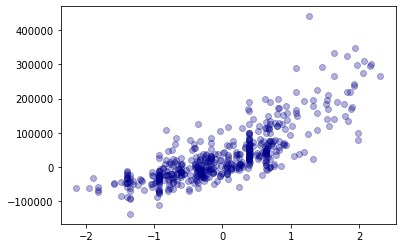

In [36]:
plt.scatter(ridge_pred, ridge_residuals, 
           c = 'darkblue', alpha = .3);

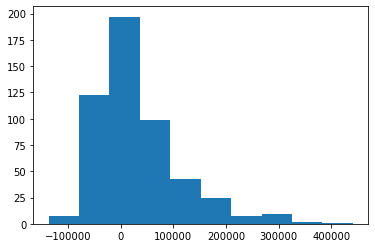

In [37]:
plt.hist(ridge_residuals);

# Coefficients and Intercept

In [38]:
ridge_coef = ridge_model.coef_
ridge_coef

array([[ 0.20383406,  0.31973136,  0.36890797, -0.0205876 ,  0.06752764,
         0.38824818,  0.0403172 ,  0.24927442,  0.01345825,  0.20585155]])

In [39]:
coef_df = pd.DataFrame({'feature': X.columns,
              'coef': ridge_coef[0]})

coef_df[(coef_df['coef'] == 0)].sort_values('coef')
# coef_df['unitized'] = coef_df['coef'] * 

,feature,coef


In [40]:
coef_df[(coef_df['coef'] > 0.005) | 
        (coef_df['coef'] < -.005)].sort_values('coef')


,feature,coef
3,bsmt_full_bath,-0.020588
8,garage_type_CarPort,0.013458
6,garage_type_Basment,0.040317
4,garage_type_2Types,0.067528
0,bsmt_finished,0.203834
9,garage_type_Detchd,0.205852
7,garage_type_BuiltIn,0.249274
1,bsmt_qual,0.319731
2,kitchen_qual,0.368908
5,garage_type_Attchd,0.388248


The model accounts for less of the housing price than the Linear Regression model, and due to the scaling of the features and coefficients done by Rdige, we will use Linear Regression in our final analysis.